In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats
import numpy as np
from sklearn import datasets, linear_model

sns.set()

# Load average ridership for weekday and weekend

## data from [here](http://web.mta.info/nyct/facts/ridership/ridership_sub_weekend.htm) and [here](http://web.mta.info/nyct/facts/ridership/ridership_sub.htm) 

In [2]:
weekday_ridership = pd.read_csv('./average_weekday_subway_ridership.csv')
weekend_ridership = pd.read_csv('./average_weekend_subway_ridership.csv')

In [3]:
weekday_ridership['IsWeekday'] = 1
weekend_ridership['IsWeekday'] = 0

weekday_ridership.loc[weekday_ridership['Borough'] == 'Manhattan', 'IsManhattan'] = 1
weekday_ridership.loc[weekday_ridership['Borough'] != 'Manhattan', 'IsManhattan'] = 0

weekend_ridership.loc[weekend_ridership['Borough'] == 'Manhattan', 'IsManhattan'] = 1
weekend_ridership.loc[weekend_ridership['Borough'] != 'Manhattan', 'IsManhattan'] = 0

daily_average_ridership = pd.concat([weekday_ridership, weekend_ridership], axis=0)

# Compare entry distributions of Manhattan stations and non-Manhattan stations

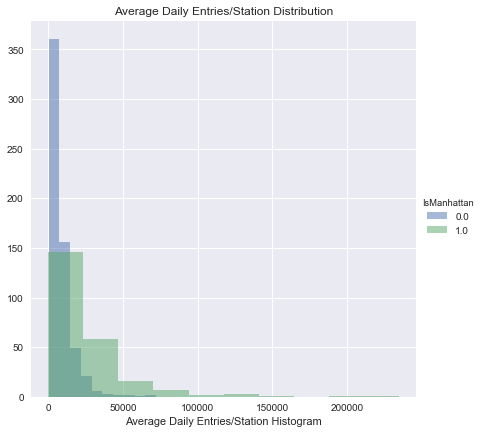

In [8]:
plot = sns.FacetGrid(daily_average_ridership, hue='IsManhattan', size=6)
plot.map(plt.hist, '2016', alpha=0.5).add_legend()
axes = plot.axes.flatten()
axes[0].set_title("Average Daily Entries/Station Distribution")
#axes[1].set_title("Weekday")
axes[0].set_xlabel("Average Daily Entries/Station Histogram")
#axes[1].set_xlabel("Average Daily Entries/Station Histogram")
plt.show()

## since they are not normal distributions, [Mann Whitney U Test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) is used to reject the null hypothesis instead of T-test.

In [5]:
def mann_whitney_plus_means(dist1, dist2):
    """
    Perform Mann Whitness Test for Non-Normally Distributed data
    """
    
    mean1 = np.mean(dist1)
    mean2 = np.mean(dist2)
    U,p = scipy.stats.mannwhitneyu(dist1, dist2)
    return mean1, mean2, U, p

In [6]:
weekday_manh = weekday_ridership[weekday_ridership['IsManhattan'] == 1]['2016']
weekday_non_manh = weekday_ridership[weekday_ridership['IsManhattan'] == 0]['2016']

m1, m2, U, p = mann_whitney_plus_means(weekday_manh, weekday_non_manh)

print('Average daily entries for Manhattan station on weekeday is %6.2f.' %m1, '\n')
print('Average daily entries for Non-Manhattan station on weekeday is  %6.2f.' %m2, '\n')
print('The probability they are from the same distribution is %0.6f' %(p*100),'%.', '\n')
if p <= 0.05:
    print('Borough of a station affects the ridership outcome.')
else:
    print('Borough of a station does NOT affects the ridership outcome.')

Average daily entries for Manhattan station on weekeday is 26437.97. 

Average daily entries for Non-Manhattan station on weekeday is  8341.57. 

The probability they are from the same distribution is 0.000000 %. 

Borough of a station affects the ridership outcome.


In [7]:
weekend_manh = weekend_ridership[weekend_ridership['IsManhattan'] == 1]['2016']
weekend_non_manh = weekend_ridership[weekend_ridership['IsManhattan'] == 0]['2016']

m1, m2, U, p = mann_whitney_plus_means(weekend_manh, weekend_non_manh)

print('Average daily entries for Manhattan station on weekend is %6.2f.' %m1, '\n')
print('Average daily entries for Non-Manhattan station on weekend is  %6.2f.' %m2, '\n')
print('The probability they are from the same distribution is %0.6f' %(p*100),'%.', '\n')
if p <= 0.05:
    print('Borough of a station affects the ridership outcome.')
else:
    print('Borough of a station does NOT affects the ridership outcome.')

Average daily entries for Manhattan station on weekend is 26303.50. 

Average daily entries for Non-Manhattan station on weekend is  8824.19. 

The probability they are from the same distribution is 0.000000 %. 

Borough of a station affects the ridership outcome.
